In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_800ppc/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'

dirs = '/pscratch/sd/g/goodwill/' + deck
data = dirs + 'data/'
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

In [3]:
def Fn(t, min, max, jfilt = True, wfilt = False):
  print(twci[t])
  el = tb.load_hydro_fil(dirs, times[t], 'electron')
  ion = tb.load_hydro_fil(dirs, times[t], 'ion')

  if wfilt == True:
    jfilt = False
    wV = tb.w_calc(dirs, t, sp = 'electron')
    w = np.sqrt(wV[0]**2 + wV[1]**2 + wV[2]**2)
    j = w
  if jfilt == True:
    j = np.sqrt((el['jx'] + ion['jx'])**2 + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2)

  jrms = np.sqrt(np.mean(j**2))
  jnrm = (j/jrms)[100:1180,:]

  df = pd.DataFrame()
  jmask = np.linspace(min, max, 50)
  JiE, JeE, JE = tb.JE_calc(dirs, times[t])
  JiE = JiE[100:1180,:]
  JeE = JeE[100:1180,:]
  JE =  JE[100:1180,:]
  pthe, pide = tb.ps_calc(dirs, times[t], 'electron')
  pthi, pidi = tb.ps_calc(dirs, times[t], 'ion')
  row = []
  for fn in jmask:  
    jfil = np.where((jnrm > fn))
    JEfilM = np.where((jnrm > fn) & (JeE < 0))
    pidifilM = np.where((jnrm > fn) & (pidi < 0))
    pidefilM = np.where((jnrm > fn) & (pide < 0))
    JEM =   np.sum(JeE[JEfilM])
    pidiM = np.sum(pidi[pidifilM])
    pideM = np.sum(pide[pidefilM])

    JEfilP = np.where((jnrm > fn) & (JeE > 0))
    pidifilP = np.where((jnrm > fn) & (pidi > 0))
    pidefilP = np.where((jnrm > fn) & (pide > 0))
    JEP =   np.sum(JeE[JEfilP])
    pidiP = np.sum(pidi[pidifilP])
    pideP = np.sum(pide[pidefilP])

    JET = np.sum(JeE[jfil])
    pideT = np.sum(pide[jfil])

    jfrn = len(jfil[0])
    JEPcnt = np.size(JEfilP)
    JEMcnt = np.size(JEfilM)
    row.append({
                'jfrn': jfrn, 
                'JEPcnt' : JEPcnt, 
                'JEP': JEP, 
                'pideP': pideP, 
                'pidiP': pidiP, 
                'JEMcnt' : JEMcnt,
                'JEM': JEM, 
                'pideM': pideM, 
                'pidiM': pidiM,
                'JE' : JET,
                'pide' : pideT
                })
  df =pd.DataFrame(row)
  return jmask, df

In [4]:
t = 510
jmask, dfJ_510 = Fn(t, 0, 5, jfilt = True)
wmask, dfw_510 = Fn(t, 0, 3, wfilt = True)
t = 1124
jmask, dfJ_1124 = Fn(t, 0, 5, jfilt = True)
wmask, dfw_1124 = Fn(t, 0, 3, wfilt = True)

70.43446800000001
70.43446800000001
155.23204320000002
155.23204320000002


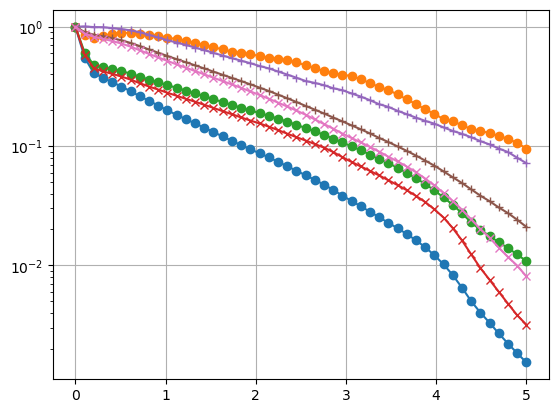

In [5]:
plt.semilogy(jmask, dfJ_510['jfrn']/dfJ_510['jfrn'][0], marker = 'o')
plt.semilogy(jmask, dfJ_510['JE']/np.abs(dfJ_510['JE'][0]), marker = 'o')
plt.semilogy(jmask, dfJ_510['JEP']/np.abs(dfJ_510['JEP'][0]), marker = 'o')
plt.semilogy(jmask, np.abs(dfJ_510['JEM'])/np.abs(dfJ_510['JEM'][0]), marker = 'x')

plt.semilogy(jmask, dfJ_510['pide']/np.abs(dfJ_510['pide'][0]), marker = '+')
plt.semilogy(jmask, np.abs(dfJ_510['pideP'])/dfJ_510['pideP'][0], marker = '+')
plt.semilogy(jmask, np.abs(dfJ_510['pideM'])/np.abs(dfJ_510['pideM'][0]), marker = 'x')
plt.grid()

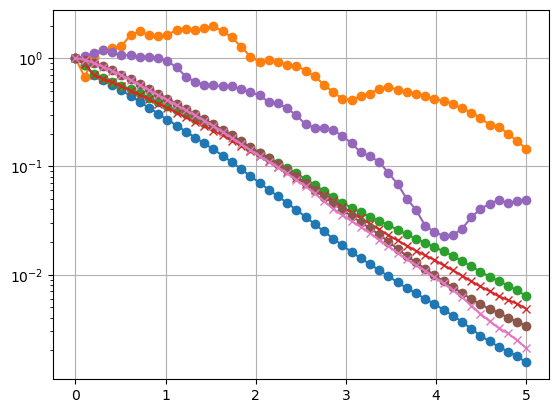

In [6]:
plt.semilogy(jmask, dfJ_1124['jfrn']/dfJ_1124['jfrn'][0], marker = 'o')
plt.semilogy(jmask, dfJ_1124['JE']/np.abs(dfJ_1124['JE'][0]), marker = 'o')
plt.semilogy(jmask, dfJ_1124['JEP']/np.abs(dfJ_1124['JEP'][0]), marker = 'o')
plt.semilogy(jmask, np.abs(dfJ_1124['JEM'])/np.abs(dfJ_1124['JEM'][0]), marker = 'x')

plt.semilogy(jmask, dfJ_1124['pide']/np.abs(dfJ_1124['pide'][0]), marker = 'o')
plt.semilogy(jmask, np.abs(dfJ_1124['pideP'])/dfJ_1124['pideP'][0], marker = 'o')
plt.semilogy(jmask, np.abs(dfJ_1124['pideM'])/np.abs(dfJ_1124['pideM'][0]), marker = 'x')
plt.grid()

In [7]:
np.abs(dfJ_510['JE'][dfJ_510['JE'] < 0])/np.abs(dfJ_510['JE'][0])

Series([], Name: JE, dtype: float64)

In [8]:
np.abs(dfJ_510['JE'][dfJ_510['JE'] < 0])/np.abs(dfJ_510['JE'][0])

Series([], Name: JE, dtype: float64)

In [9]:
dfw_1124['JEM']/np.abs(dfw_1124['JEM'][0])

0    -1.000000
1    -0.999608
2    -0.996857
3    -0.989524
4    -0.976021
5    -0.955039
6    -0.925968
7    -0.889179
8    -0.844976
9    -0.794160
10   -0.738460
11   -0.679480
12   -0.618401
13   -0.557313
14   -0.498102
15   -0.440480
16   -0.386939
17   -0.336579
18   -0.290947
19   -0.249680
20   -0.212772
21   -0.180652
22   -0.152072
23   -0.127643
24   -0.106194
25   -0.088100
26   -0.072764
27   -0.059672
28   -0.048898
29   -0.039739
30   -0.032194
31   -0.026098
32   -0.021182
33   -0.017062
34   -0.013681
35   -0.010939
36   -0.008684
37   -0.006950
38   -0.005606
39   -0.004502
40   -0.003604
41   -0.002949
42   -0.002377
43   -0.001929
44   -0.001517
45   -0.001217
46   -0.001020
47   -0.000837
48   -0.000669
49   -0.000565
Name: JEM, dtype: float64

In [10]:
dfw_1124['JEP']/np.abs(dfw_1124['JEP'][0])

0     1.000000
1     0.999585
2     0.996924
3     0.989894
4     0.976589
5     0.955751
6     0.926515
7     0.889607
8     0.845638
9     0.795281
10    0.739371
11    0.680932
12    0.619787
13    0.559177
14    0.499748
15    0.442505
16    0.388327
17    0.338307
18    0.292731
19    0.251648
20    0.214325
21    0.181582
22    0.153024
23    0.128141
24    0.106977
25    0.088858
26    0.073200
27    0.060171
28    0.049247
29    0.040065
30    0.032527
31    0.026154
32    0.021087
33    0.016923
34    0.013560
35    0.010910
36    0.008666
37    0.006876
38    0.005441
39    0.004226
40    0.003357
41    0.002649
42    0.002084
43    0.001655
44    0.001267
45    0.001022
46    0.000799
47    0.000629
48    0.000523
49    0.000400
Name: JEP, dtype: float64

In [11]:
np.abs(dfw_1124['JEP']/np.abs(dfw_1124['JEP'][0]) + dfw_1124['JEM']/np.abs(dfw_1124['JEM'][0]))

0     0.000000
1     0.000023
2     0.000067
3     0.000369
4     0.000568
5     0.000712
6     0.000547
7     0.000428
8     0.000662
9     0.001120
10    0.000912
11    0.001452
12    0.001385
13    0.001863
14    0.001646
15    0.002024
16    0.001388
17    0.001728
18    0.001784
19    0.001968
20    0.001553
21    0.000930
22    0.000952
23    0.000498
24    0.000784
25    0.000758
26    0.000436
27    0.000499
28    0.000349
29    0.000325
30    0.000333
31    0.000057
32    0.000095
33    0.000139
34    0.000122
35    0.000029
36    0.000018
37    0.000075
38    0.000165
39    0.000276
40    0.000248
41    0.000300
42    0.000293
43    0.000273
44    0.000249
45    0.000195
46    0.000221
47    0.000208
48    0.000145
49    0.000165
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


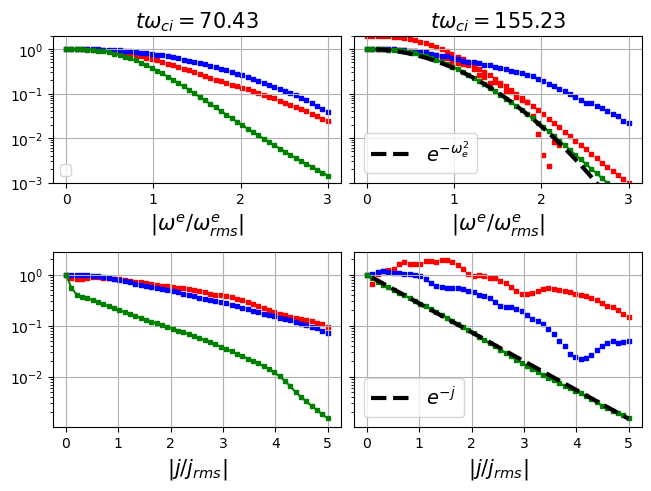

In [12]:
import matplotlib
fig5 = plt.figure(constrained_layout = True)
subfigs = fig5.subfigures(2, 1)

ax0 = subfigs[0].subplots(1, 2, sharex=True, sharey = True)
ax1 = subfigs[1].subplots(1, 2, sharex=True, sharey = True)

matplotlib.rcParams['lines.markersize'] = 2

# ax0[0].semilogy(wmask, dfw_510['jfrn']/dfw_510['jfrn'][0], marker = 'o', c = 'green', label = 'Area')
# ax0[0].scatter(wmask, dfw_510['JE']/np.abs(dfw_510['JE'][0]), marker = 'o', c = 'red', label = r'$|j \cdot E|$')
# # ax0[0].semilogy(wmask, (dfw_510['JEP'])/np.abs(dfw_510['JEP'] + dfw_510['JEM'])[0], c = 'maroon', label = r'$j \cdot E^{(+)}$')
# # ax0[0].semilogy(wmask, np.abs(dfw_510['JEM'])/np.abs(dfw_510['JEM'][0]), c = 'tomato', label = r'$j \cdot E^{(-)}$')
# ax0[0].scatter(wmask, dfw_510['pide']/np.abs(dfw_510['pide'][0]), marker = 'o', c = 'blue', label = r'$|PiD_e|$')
# # ax0[0].semilogy(wmask, np.abs(dfw_510['pideP'])/dfw_510['pideP'][0], c = 'navy', label = r'$PiD_e^{(+)}$')
# # ax0[0].semilogy(wmask, np.abs(dfw_510['pideM'])/np.abs(dfw_510['pideM'][0]), c = 'deepskyblue', label = r'$PiD_e^{(-)}$')
# ax0[0].grid()


ax0[0].semilogy(wmask, dfw_510['jfrn']/dfw_510['jfrn'][0], marker = 's', markersize = 3,  c = 'green')
ax0[0].scatter(wmask, dfw_510['JE']/np.abs(dfw_510['JE'][0]), marker = 's', c = 'red', s = 10)
ax0[0].scatter(wmask[dfw_510['JE'] < 0], np.abs(dfw_510['JE'][dfw_510['JE'] < 0])/np.abs(dfw_510['JE'][0]),s = 10, marker = 's', c = 'none', edgecolors = 'r')

# ax1[1].semilogy(jmask, dfJ_1124['JEP']/np.abs(dfJ_1124['JEP'][0]), c = 'maroon')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['JEM'])/np.abs(dfJ_1124['JEM'][0]), c = 'tomato')
ax0[0].scatter(wmask, dfw_510['pide']/np.abs(dfw_510['pide'][0]),s = 10, marker = 's', c = 'blue')
ax0[0].scatter(wmask[dfw_510['pide'] < 0], np.abs(dfw_510['pide'][dfw_510['pide'] < 0])/np.abs(dfw_510['pide'][0]),s = 10, marker = 's', c = 'blue')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['pideP'])/dfJ_1124['pideP'][0], c = 'navy')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['pideM'])/np.abs(dfJ_1124['pideM'][0]), c = 'deepskyblue')
ax0[0].grid()

ax0[1].semilogy(wmask, dfw_1124['jfrn']/dfw_1124['jfrn'][0], marker = 's', markersize = 3,  c = 'green')
ax0[1].scatter(wmask, dfw_1124['JE']/np.abs(dfw_1124['JE'][0]), marker = 's', c = 'red', s = 10)
ax0[1].scatter(wmask, dfw_1124['JEP']/np.abs(dfw_1124['JEP'][0]) - dfw_1124['JEM']/np.abs(dfw_1124['JEM'][0]), marker = 's', c = 'red', s = 10)
# ax1[1].semilogy(jmask, dfJ_1124['JEP']/np.abs(dfJ_1124['JEP'][0]), c = 'maroon')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['JEM'])/np.abs(dfJ_1124['JEM'][0]), c = 'tomato')
ax0[1].scatter(wmask, dfw_1124['pide']/np.abs(dfw_1124['pide'][0]),s = 10, marker = 's', c = 'blue')
ax0[1].scatter(wmask[dfw_1124['pide'] < 0], np.abs(dfw_1124['pide'][dfw_1124['pide'] < 0])/np.abs(dfw_1124['pide'][0]),s = 10, marker = 's', c = 'blue')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['pideP'])/dfJ_1124['pideP'][0], c = 'navy')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['pideM'])/np.abs(dfJ_1124['pideM'][0]), c = 'deepskyblue')
ax0[1].grid()

x1 = np.linspace(0.1, 3, 200)
y1 = np.exp(- x1**2)
ax0[1].plot(x1, y1, c = 'black', linestyle = 'dashed', linewidth = 3, label = r'$e^{-\omega_e^2}$')

# ax1[0].semilogy(jmask, dfJ_510['jfrn']/dfJ_510['jfrn'][0], marker = 's', c = 'green')
# ax1[0].scatter(jmask, dfJ_510['JE']/np.abs(dfJ_510['JE'][0]), marker = 's', c = 'red')
# # ax1[0].semilogy(jmask, dfJ_510['JEP']/np.abs(dfJ_510['JEP'][0]), c = 'maroon')
# # ax1[0].semilogy(jmask, np.abs(dfJ_510['JEM'])/np.abs(dfJ_510['JEM'][0]), c = 'tomato')
# ax1[0].scatter(jmask, dfJ_510['pide']/np.abs(dfJ_510['pide'][0]), marker = 's', c = 'blue')
# # ax1[0].semilogy(jmask, np.abs(dfJ_510['pideP'])/dfJ_510['pideP'][0], c = 'navy')
# # ax1[0].semilogy(jmask, np.abs(dfJ_510['pideM'])/np.abs(dfJ_510['pideM'][0]), c = 'deepskyblue')
# ax1[0].grid()

ax1[0].semilogy(jmask, dfJ_510['jfrn']/dfJ_510['jfrn'][0], marker = 's', markersize = 3,  c = 'green')
ax1[0].scatter(jmask, dfJ_510['JE']/np.abs(dfJ_510['JE'][0]), marker = 's', c = 'red', s = 10)
ax1[0].scatter(jmask[dfJ_510['JE'] < 0], np.abs(dfJ_510['JE'][dfJ_510['JE'] < 0])/np.abs(dfJ_510['JE'][0]),s = 10, marker = 's', c = 'none', edgecolors = 'r')
# ax1[1].semilogy(jmask, dfJ_1124['JEP']/np.abs(dfJ_1124['JEP'][0]), c = 'maroon')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['JEM'])/np.abs(dfJ_1124['JEM'][0]), c = 'tomato')
ax1[0].scatter(jmask, dfJ_510['pide']/np.abs(dfJ_510['pide'][0]),s = 10, marker = 's', c = 'blue')
ax1[0].scatter(jmask[dfJ_510['pide'] < 0], np.abs(dfJ_510['pide'][dfJ_510['pide'] < 0])/np.abs(dfJ_510['pide'][0]),s = 10, marker = 's', c = 'blue')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['pideP'])/dfJ_1124['pideP'][0], c = 'navy')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['pideM'])/np.abs(dfJ_1124['pideM'][0]), c = 'deepskyblue')
ax1[0].grid()

ax1[1].semilogy(jmask, dfJ_1124['jfrn']/dfJ_1124['jfrn'][0], marker = 's', markersize = 3,  c = 'green')
ax1[1].scatter(jmask, dfJ_1124['JE']/np.abs(dfJ_1124['JE'][0]), marker = 's', c = 'red', s = 10)
ax1[1].scatter(jmask[dfJ_1124['JE'] < 0], np.abs(dfJ_1124['JE'][dfJ_1124['JE'] < 0])/np.abs(dfJ_1124['JE'][0]),s = 10, marker = 's', c = 'none', edgecolors = 'r')
# ax1[1].semilogy(jmask, dfJ_1124['JEP']/np.abs(dfJ_1124['JEP'][0]), c = 'maroon')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['JEM'])/np.abs(dfJ_1124['JEM'][0]), c = 'tomato')
ax1[1].scatter(jmask, dfJ_1124['pide']/np.abs(dfJ_1124['pide'][0]),s = 10, marker = 's', c = 'blue')
ax1[1].scatter(jmask[dfJ_1124['pide'] < 0], np.abs(dfJ_1124['pide'][dfJ_1124['pide'] < 0])/np.abs(dfJ_1124['pide'][0]),s = 10, marker = 's', c = 'blue')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['pideP'])/dfJ_1124['pideP'][0], c = 'navy')
# ax1[1].semilogy(jmask, np.abs(dfJ_1124['pideM'])/np.abs(dfJ_1124['pideM'][0]), c = 'deepskyblue')
ax1[1].grid()

x1 = np.linspace(0.1, 5, 200)
y1 = np.exp(- 1.3 * x1)
ax1[1].plot(x1, y1, c = 'black', linestyle = 'dashed', linewidth = 3, label = r'$e^{-j}$')

ax0[0].set_xlabel(r'$|\omega^e/\omega^e_{rms}|$', size = 15)
ax0[1].set_xlabel(r'$|\omega^e/\omega^e_{rms}|$', size = 15)
ax1[0].set_xlabel(r'$|j/j_{rms}|$', size = 15)
ax1[1].set_xlabel(r'$|j/j_{rms}|$', size = 15)

ax0[0].legend(loc = 'lower left')
ax0[1].legend(loc = 'lower left', fontsize = 14)
ax1[1].legend(loc = 'lower left', fontsize = 14)

snap = [510, 1124]

ax0[0].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[snap[0]],2)}', fontsize = 15)
ax0[1].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[snap[1]],2)}', fontsize = 15)

ax0[0].set_ylim(10**(-3), 2)
ax0[1].set_ylim(10**(-3), 2)

fig5.savefig(figs + 'fn_log.png')

In [13]:
dfw_510['JE']/dfw_510['JE'][0]

0     1.000000
1     0.999662
2     0.998251
3     0.995566
4     0.987412
5     0.976686
6     0.957216
7     0.936401
8     0.916273
9     0.887755
10    0.849372
11    0.808454
12    0.763950
13    0.728724
14    0.685139
15    0.639233
16    0.597617
17    0.553479
18    0.506964
19    0.471762
20    0.433928
21    0.395538
22    0.361602
23    0.331405
24    0.302306
25    0.277224
26    0.249649
27    0.227690
28    0.206298
29    0.187171
30    0.175438
31    0.159492
32    0.145572
33    0.134315
34    0.123378
35    0.112688
36    0.103721
37    0.093109
38    0.085272
39    0.077576
40    0.068553
41    0.062019
42    0.055789
43    0.049529
44    0.044580
45    0.039878
46    0.035289
47    0.031441
48    0.027206
49    0.023859
Name: JE, dtype: float64

In [14]:
(dfw_510['JEP'] + dfw_510['JEM'])/np.abs(dfw_510['JEP'] + dfw_510['JEM'])[0]

0     1.000000
1     0.999662
2     0.998251
3     0.995566
4     0.987412
5     0.976686
6     0.957216
7     0.936401
8     0.916273
9     0.887755
10    0.849372
11    0.808454
12    0.763950
13    0.728724
14    0.685139
15    0.639233
16    0.597617
17    0.553479
18    0.506964
19    0.471762
20    0.433928
21    0.395538
22    0.361602
23    0.331405
24    0.302306
25    0.277224
26    0.249649
27    0.227690
28    0.206298
29    0.187171
30    0.175438
31    0.159492
32    0.145572
33    0.134315
34    0.123378
35    0.112688
36    0.103721
37    0.093109
38    0.085272
39    0.077576
40    0.068553
41    0.062019
42    0.055789
43    0.049529
44    0.044580
45    0.039878
46    0.035289
47    0.031441
48    0.027206
49    0.023859
dtype: float64

In [15]:
dfJ_510['jfrn']

0     2764800
1     1524810
2     1126666
3     1031072
4      948612
5      870489
6      795397
7      723707
8      661078
9      604116
10     550167
11     504615
12     464497
13     428228
14     393998
15     362117
16     332561
17     306074
18     281392
19     259690
20     240911
21     222368
22     204434
23     187463
24     171931
25     157565
26     144212
27     131483
28     118689
29     106364
30      95855
31      86620
32      77882
33      69978
34      62861
35      56663
36      50673
37      44888
38      39302
39      33645
40      28231
41      22934
42      18000
43      13877
44      11118
45       9147
46       7432
47       6120
48       5085
49       4247
Name: jfrn, dtype: int64

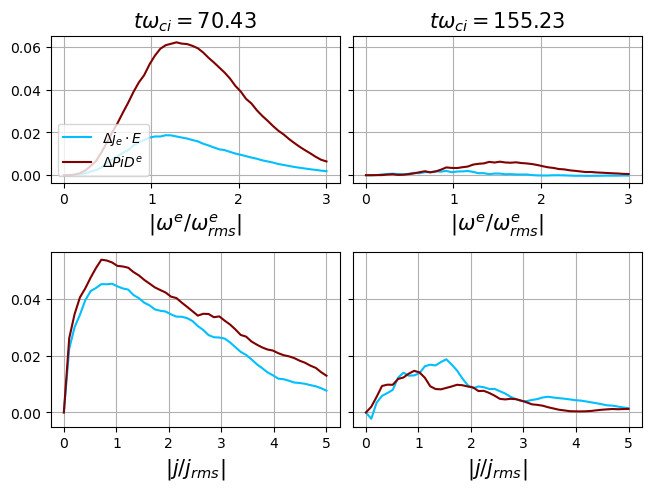

In [22]:
fig5 = plt.figure(constrained_layout = True)
subfigs = fig5.subfigures(2, 1)

ax0 = subfigs[0].subplots(1, 2, sharex=True, sharey = True)
ax1 = subfigs[1].subplots(1, 2, sharex=True, sharey = True)

matplotlib.rcParams['lines.markersize'] = 2
ax0[0].plot(wmask, dfw_510['JEP']/np.abs(dfw_510['JEP'][0]) - np.abs(dfw_510['JEM']/dfw_510['JEM'][0]), c = 'deepskyblue', label = r'$\Delta j_e \cdot E$')
ax0[0].plot(wmask, dfw_510['pideP']/np.abs(dfw_510['pideP'][0]) - np.abs(dfw_510['pideM']/dfw_510['pideM'][0]), c = 'maroon', label = r'$\Delta PiD^e$')


ax0[1].plot(wmask, dfw_1124['JEP']/np.abs(dfw_1124['JEP'][0]) - np.abs(dfw_1124['JEM']/dfw_1124['JEM'][0]), c = 'deepskyblue')
ax0[1].plot(wmask, dfw_1124['pideP']/np.abs(dfw_1124['pideP'][0]) - np.abs(dfw_1124['pideM']/dfw_1124['pideM'][0]), c = 'maroon')

ax1[0].plot(jmask, dfJ_510['JEP']/np.abs(dfJ_510['JEP'][0]) - np.abs(dfJ_510['JEM']/dfJ_510['JEM'][0]), c = 'deepskyblue')
ax1[0].plot(jmask, dfJ_510['pideP']/np.abs(dfJ_510['pideP'][0]) - np.abs(dfJ_510['pideM']/dfJ_510['pideM'][0]), c = 'maroon')

ax1[1].plot(jmask, dfJ_1124['JEP']/np.abs(dfJ_1124['JEP'][0]) - np.abs(dfJ_1124['JEM']/dfJ_1124['JEM'][0]), c = 'deepskyblue')
ax1[1].plot(jmask, dfJ_1124['pideP']/np.abs(dfJ_1124['pideP'][0]) - np.abs(dfJ_1124['pideM']/dfJ_1124['pideM'][0]), c = 'maroon')

ax0[0].set_xlabel(r'$|\omega^e/\omega^e_{rms}|$', size = 15)
ax0[1].set_xlabel(r'$|\omega^e/\omega^e_{rms}|$', size = 15)
ax1[0].set_xlabel(r'$|j/j_{rms}|$', size = 15)
ax1[1].set_xlabel(r'$|j/j_{rms}|$', size = 15)

ax0[0].legend(loc = 'lower left')

ax0[0].grid()
ax0[1].grid()
ax1[0].grid()
ax1[1].grid()

snap = [510, 1124]

ax0[0].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[snap[0]],2)}', fontsize = 15)
ax0[1].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[snap[1]],2)}', fontsize = 15)

fig5.savefig(figs + 'fn_diff.png')

In [21]:
dfJ_1124['pideM']/dfJ_1124['pideM'][0]

0     1.000000
1     0.966702
2     0.901071
3     0.835126
4     0.766148
5     0.694836
6     0.625513
7     0.562767
8     0.505728
9     0.455150
10    0.409107
11    0.367061
12    0.330261
13    0.295870
14    0.264771
15    0.235662
16    0.208492
17    0.183307
18    0.160821
19    0.141409
20    0.124975
21    0.110894
22    0.097685
23    0.086243
24    0.075342
25    0.065520
26    0.056176
27    0.047603
28    0.040758
29    0.035520
30    0.031209
31    0.027629
32    0.024177
33    0.021049
34    0.018336
35    0.015868
36    0.013873
37    0.012219
38    0.010834
39    0.009496
40    0.008286
41    0.007228
42    0.006206
43    0.005177
44    0.004344
45    0.003716
46    0.003206
47    0.002858
48    0.002470
49    0.002079
Name: pideM, dtype: float64